In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [208]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split , GridSearchCV
import warnings 
warnings.filterwarnings("ignore")

In [209]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:>

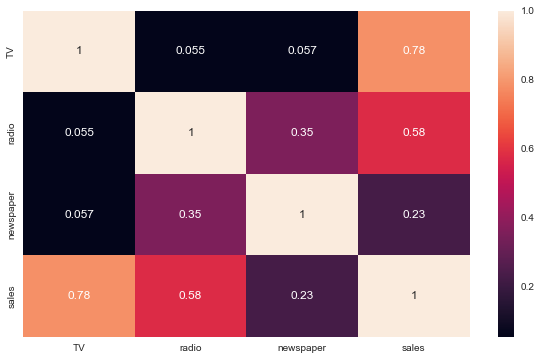

In [211]:
sns.heatmap(df.corr(),annot=True)

In [212]:
X = df.drop("sales",axis=1)

In [213]:
y = df["sales"]

In [214]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [215]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [216]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

### Linear Regression

In [217]:
from sklearn.linear_model import LinearRegression

In [218]:
model = LinearRegression()

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

In [220]:
model.fit(X_train,y_train)        # burada öğrenme gerçekleşti aslında 

LinearRegression()

In [221]:
dir(model)        ## modelin içerisinde neler var ? 

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [222]:
model.coef_

array([ 0.04458402,  0.19649703, -0.00278146])

In [223]:
model.intercept_

2.99489303049533

In [224]:
?model

In [225]:
coeff_df = pd.DataFrame(data=model.coef_ ,index=X.columns,columns=["Coefficient"])
coeff_df

,Coefficient
TV,0.044584
radio,0.196497
newspaper,-0.002781


In [226]:
y_pred = model.predict(X_test)

In [227]:
eval_metric(y_test,y_pred)       # actual,pred

Model testing performance:
--------------------------
R2_score 	: 0.8601145185017868
MAE 		: 1.3617813502090275
MSE 		: 4.402118291449685
RMSE 		: 2.0981225634956804


In [228]:
y_train_pred = model.predict(X_train)

In [229]:
eval_metric(y_train,y_train_pred)                   # overfittingliği gördük.

Model testing performance:
--------------------------
R2_score 	: 0.9067114990146383
MAE 		: 1.2131871622729427
MSE 		: 2.406814755818906
RMSE 		: 1.5513912323520802


In [230]:
my_dict = {"actual":y_test,"pred":y_pred}
compare = pd.DataFrame(my_dict)
compare.sample(8)

,actual,pred
180,10.5,10.464557
7,13.2,12.172969
22,5.6,6.569744
111,21.8,21.173208
5,7.2,12.782869
80,11.8,11.585556
18,11.3,10.057396
55,23.7,21.402720


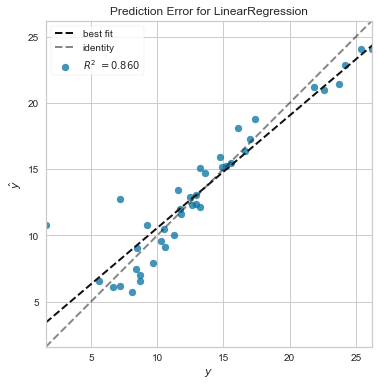

In [231]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

In [232]:
residuals = y_test-y_pred  # error

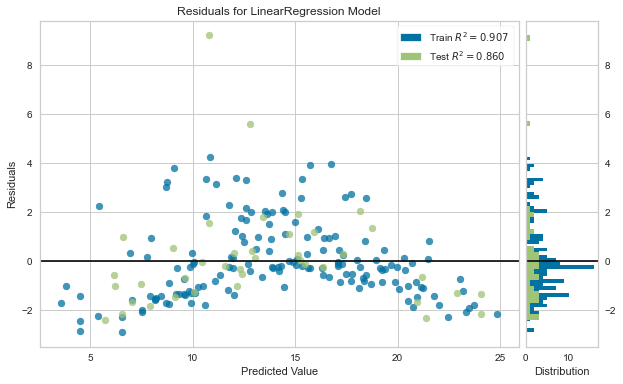

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [233]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

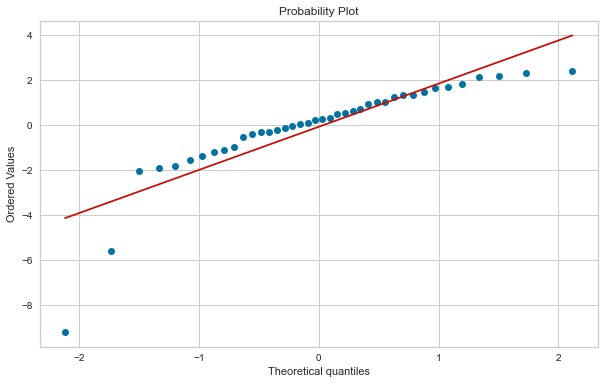

In [234]:
import scipy.stats as stats
stats.probplot(residuals, dist ="norm", plot =plt);     

### cv ile modelimizin gerçek score'unu görebiliriz.

In [235]:
from sklearn.model_selection import cross_val_score

In [236]:
capraz_dogrulama = cross_val_score(estimator=model  ,  X =X_train , y = y_train , cv=10 )

In [237]:
capraz_dogrulama

array([0.88570699, 0.91205792, 0.93210001, 0.8618314 , 0.89579363,
       0.93868657, 0.79885218, 0.92502874, 0.75344298, 0.92948385])

In [238]:
capraz_dogrulama.mean()                   #r2_score'umla aynı çıkmadığına dikkat

0.8832984266379699

In [239]:
capraz_dogrulama = cross_val_score(estimator=model  ,  X =X_train , y = y_train , cv=10 ,scoring="neg_mean_squared_error")

In [240]:
capraz_dogrulama

array([-1.71524789, -1.67158319, -1.83164463, -4.44175358, -1.22520234,
       -2.78857297, -3.57788547, -2.46388059, -4.00592555, -2.39062693])

In [241]:
-capraz_dogrulama.mean()       # çapraz doğrılamada hatalara da daha sağlıklı bakabiliyoruz.

2.6112323155583232

### overfitting durumunu yukarıda görmüştük şimdi bununla mücadele edeceğiz .

## 1-) Ridge Regression

In [242]:
from sklearn.linear_model import Ridge        # -----> model için
from sklearn.linear_model import RidgeCV      # -------> uygun parametre için

In [243]:
scaler = StandardScaler()

In [244]:
scaler.fit(X_train)        # ------> scaler boş bir şeydi ve x_trainden kalıp çıkardı nasıl scale edeceğini öğrendi.

StandardScaler()

In [245]:
X_train               # --------> değişmedi.

,TV,radio,newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6
...,...,...,...
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5


In [246]:
X_train_scaled = scaler.transform(X_train)    # transform ile scaler'ın tanıdığı kalıba göre transfrom uygulamış olduk.

In [247]:
X_train

,TV,radio,newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6
...,...,...,...
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5


In [248]:
X_train_scaled

array([[-1.34155345,  1.0355176 ,  1.65941078],
       [-1.4053143 ,  0.08249594, -1.30629738],
       [-0.08995151,  0.40243892, -0.81980897],
       [ 0.69761311, -0.18979597, -0.90868666],
       [ 0.76609699,  0.01442296,  1.28518893],
       [-0.56461564,  0.42286082, -1.01627544],
       [-1.67570755, -1.44914602, -1.36243065],
       [-1.57770476,  1.38268978,  2.77272078],
       [-0.29304164,  0.91979354,  2.29558792],
       [-0.54218127, -1.20408331,  0.19994556],
       [-0.48078193, -0.61865571,  0.07364569],
       [ 0.93258366,  0.60665785,  2.06169926],
       [ 1.2195075 , -0.14214488, -0.00587645],
       [ 0.40596624, -0.16256678, -0.3800983 ],
       [-1.24945444,  0.16418351, -0.44558712],
       [-1.04164129, -0.73437977, -0.55317591],
       [ 1.68118331,  0.33436595,  0.6115896 ],
       [ 0.25955243, -0.35997841,  0.02686796],
       [ 0.61377939, -0.07407191,  0.06896792],
       [-1.69105739,  0.32075135,  0.52738968],
       [ 1.35411375, -1.39468764,  0.602

In [249]:
type(X_train_scaled)

numpy.ndarray

In [250]:
X_test_scaled = scaler.transform(X_test)                # burada X_test'i transform edeceğiz sadece fit yok burada scaler
X_test_scaled                                           # kalıbı biliyor ona göre transform edeceğiz.

array([[-0.96016909, -0.19660326, -0.55317591],
       [-1.18687434, -0.80245275, -0.54849813],
       [-0.7098487 , -1.57167737, -0.32396502],
       [ 1.6433991 ,  1.28738761,  0.98581145],
       [ 0.23239503, -1.06113006,  0.23736775],
       [-1.11366744, -1.20408331, -0.01990977],
       [-1.6745268 ,  1.73666925,  2.09912145],
       [ 1.05774385, -1.09516654, -1.00224213],
       [-1.49623256,  0.79726218,  1.67344409],
       [ 0.55592232, -0.00599893, -0.7449646 ],
       [ 1.30806424,  1.3146168 ,  1.14953351],
       [-0.74763291, -0.78883815, -0.19766515],
       [ 0.07181214, -1.41510953, -1.02095322],
       [ 0.44020818, -0.15575948, -0.96481994],
       [-0.87515461,  0.22544919, -0.36606498],
       [-0.35798325, -0.25786894, -0.8665867 ],
       [ 1.35883677, -0.23063975, -1.39517507],
       [-1.76898732,  1.10359057, -1.00224213],
       [-0.89522748,  1.77070574,  0.72853393],
       [ 0.74248186,  0.08249594, -0.79642011],
       [ 1.61860321,  1.33503869,  1.949

In [251]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round() #Applying aggregation across all the columns, mean and std will be found for each column in the dataframe

,0,1,2
mean,0.0,-0.0,-0.0
std,1.0,1.0,1.0


In [252]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2
mean,-0.0,-0.0,0.0
std,1.0,1.0,1.0


In [253]:
ridge_model = Ridge()       # default ------> alpha : 1.0  , random_state=None

In [254]:
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [255]:
y_pred = ridge_model.predict(X_test_scaled)

In [256]:
y_train_pred = ridge_model.predict(X_train_scaled)

In [257]:
def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [258]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.906676,0.859975
mae,1.213987,1.360951
mse,2.407728,4.406507
rmse,1.551685,2.099168


In [259]:
capraz_dogrulama = cross_val_score(estimator=ridge_model  ,  X = X_train_scaled , y = y_train , cv=10 )
capraz_dogrulama

array([0.88648017, 0.91087208, 0.93337817, 0.86073539, 0.89685864,
       0.93724246, 0.80177518, 0.92528278, 0.75438861, 0.92905381])

In [260]:
capraz_dogrulama.mean()              
# normal modelimin cv'si ------> 88.32 idi. burada biraz arttı. ama daha alpha ile oynamadık

0.883606729382136

#### alpha ile oynayalım.

In [261]:
ridge_model.alpha      # bu zaten default değerimdi.buna göre ridge uyguladı.

1.0

In [262]:
ridge_model = Ridge(alpha=3)  

In [263]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=3)

In [264]:
y_pred = ridge_model.predict(X_test_scaled)

In [265]:
y_train_pred = ridge_model.predict(X_train_scaled)

In [266]:
rs_alpha3 = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs_alpha3

,ridge_train,ridge_test
R2,0.906402,0.859489
mae,1.217628,1.360011
mse,2.414804,4.421802
rmse,1.553964,2.102808


In [267]:
capraz_dogrulama = cross_val_score(estimator=ridge_model  ,  X = X_train_scaled , y = y_train , cv=10 )
capraz_dogrulama

array([0.8877126 , 0.90833945, 0.93557254, 0.85841621, 0.89866863,
       0.93420484, 0.80709203, 0.9254561 , 0.75594135, 0.92790406])

In [268]:
capraz_dogrulama.mean()              
# normal modelimin cv'si ------> 88.32 idi. burada biraz arttı. ama daha alpha ile oynamadık

0.8839307817414618

In [269]:
## çok az bir düşüş var.

## cross validation'nun uygun parametre seçmesiyle yaparsak bunu eğer :

In [270]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [271]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10)
ridge_cv_model

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [272]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [273]:
ridge_cv_model.alpha_        # en iyi alpha buymuş.diyor bizim verdiklerimize göre.

3.7181818181818183

## alpha'nın en makul değerini yellowbrick ile de bulabiliriz:

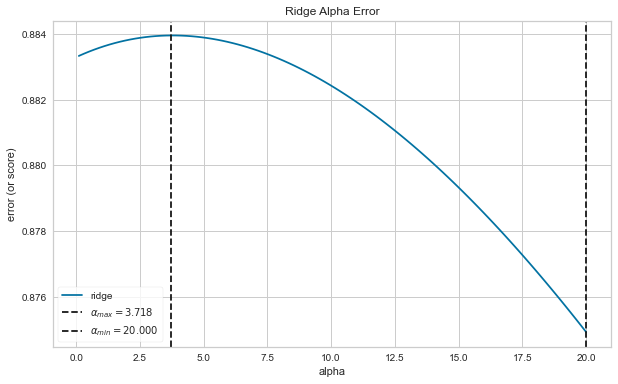

In [274]:
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)


# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10,

)

visualizer.fit(X_train_scaled, y_train)
visualizer.show();

In [275]:
# en iyisi 3.71
# en kötüsü alphanın : 20 demiş bize.

In [276]:
## 3.7'ye göre deneyelim:

In [277]:
ridge_model = Ridge(alpha=3.7)  
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)

In [278]:
y_train_pred = ridge_model.predict(X_train_scaled)

In [279]:
## alpha = 3'e göre neydi ? buna bakıp karşılaştıralım.

In [285]:
rs_alpha3_7 = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs_alpha3_7                                                            # sadece buna baksak yanlış yaparız

,ridge_train,ridge_test
R2,0.906245,0.859257
mae,1.219584,1.360360
mse,2.418850,4.429100
rmse,1.555265,2.104543


In [282]:
capraz_dogrulama = cross_val_score(estimator=ridge_model  ,  X = X_train_scaled , y = y_train , cv=10 )
capraz_dogrulama

array([0.8880503 , 0.90740564, 0.93623229, 0.85756682, 0.8992068 ,
       0.93309777, 0.80879463, 0.92541755, 0.75638439, 0.92741638])

In [283]:
capraz_dogrulama.mean()

0.8839572574970613

In [284]:
## çok çok az artmış alpha = 3 iken yapılan cv'e göre.

In [289]:
ridge_model.coef_                         # feature importance gibi bir çıkarım yapabiliriz.scale ettiğimiz için.

array([ 3.6900482 ,  2.814495  , -0.02611704])

### Lasso Regression

In [291]:
from sklearn.linear_model import Lasso        # -----> model için
from sklearn.linear_model import LassoCV      # -------> uygun parametre için

In [292]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [293]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [294]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.832340,0.790028
mae,1.577831,1.645260
mse,4.325572,6.607710
rmse,2.079801,2.570547


In [295]:
capraz_dogrulama = cross_val_score(estimator=lasso_model  ,  X = X_train_scaled , y = y_train , cv=10 )
capraz_dogrulama

array([0.88242045, 0.81471024, 0.89943288, 0.76228078, 0.85392833,
       0.80476405, 0.78932022, 0.84663936, 0.67266699, 0.82893631])

In [297]:
capraz_dogrulama.mean()              # bunda da alpha defaultu 1 ve bizi kötü etkilemiş : 

0.8155099608241121

In [298]:
lasso_model.alpha

1.0

In [299]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [300]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv = 10)
lasso_cv_model

LassoCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [301]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [302]:
lasso_cv_model.alpha_           

0.1

### benim verdiğim değerler arasında 0.1 lasso en uygun parametreymiş